# Rf 7 0 5_Linearmorph
Speecial p.d.f.'s: linear interpolation between p.d.f shapes using the 'Alex Read' algorithm



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:02 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooPolynomial.h"
#include "RooIntegralMorph.h"
#include "RooNLLVar.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
#include "TH1.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create end point pdf shapes
 ------------------------------------------------------

Observable

In [3]:
RooRealVar x("x", "x", -20, 20);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Lower end point shape: a gaussian

In [4]:
RooRealVar g1mean("g1mean", "g1mean", -10);
RooGaussian g1("g1", "g1", x, g1mean, RooConst(2));

Upper end point shape: a polynomial

In [5]:
RooPolynomial g2("g2", "g2", x, RooArgSet(RooConst(-0.03), RooConst(-0.001)));

Create interpolating pdf
 -----------------------------------------------

Create interpolation variable

In [6]:
RooRealVar alpha("alpha", "alpha", 0, 1.0);

Specify sampling density on observable and interpolation variable

In [7]:
x.setBins(1000, "cache");
alpha.setBins(50, "cache");

Construct interpolating pdf in (x,a) represent g1(x) at a=a_min
 and g2(x) at a=a_max

In [8]:
RooIntegralMorph lmorph("lmorph", "lmorph", g1, g2, x, alpha);

Plot interpolating pdf at various alpha
 -----------------------------------------------------------------------------

Show end points as blue curves

In [9]:
RooPlot *frame1 = x.frame();
g1.plotOn(frame1);
g2.plotOn(frame1);

Show interpolated shapes in red

In [10]:
alpha.setVal(0.125);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.25);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.375);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.50);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.625);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.75);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.875);
lmorph.plotOn(frame1, LineColor(kRed));
alpha.setVal(0.95);
lmorph.plotOn(frame1, LineColor(kRed));

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c6715b0 with pdf g1_MORPH_g2_CA

Show 2d distribution of pdf(x,alpha)
 -----------------------------------------------------------------------

Create 2d histogram

In [11]:
TH1 *hh = lmorph.createHistogram("hh", x, Binning(40), YVar(alpha, Binning(40)));
hh->SetLineColor(kBlue);

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c572210 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x,alpha) with code 0 from preexisting content.


Fit pdf to dataset with alpha=0.8
 -----------------------------------------------------------------

Generate a toy dataset at alpha = 0.8

In [12]:
alpha = 0.8;
RooDataSet *data = lmorph.generate(x, 1000);

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c5689c0 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c65ee30 with pdf g1_MORPH_g2_CACHE_Obs[x] for nset (x) with code 0 from preexisting content.


Fit pdf to toy data

In [13]:
lmorph.setCacheAlpha(kTRUE);
lmorph.fitTo(*data, Verbose(kTRUE));

[#0] PROGRESS:Eval -- RooIntegralMorph::fillCacheObject(lmorph) filling multi-dimensional cache..................................................

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c703690 with pdf g1_MORPH_g2_CACHE_Obs[alpha,x] for nset (x) with code 0
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (g1,g2)
[#0] WARNING:Minization -- RooMinimizerFcn::synchronize: WARNING: no initial error estimate available for alpha: using 0.1
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha        8.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 ******

Plot fitted pdf and data overlaid

In [14]:
RooPlot *frame2 = x.frame(Bins(100));
data->plotOn(frame2);
lmorph.plotOn(frame2);

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c7ff260 with pdf g1_MORPH_g2_CACHE_Obs[alpha,x] for nset (x) with code 0 from preexisting content.


Scan -log(l) vs alpha
 -----------------------------------------

Show scan -log(l) of dataset w.r.t alpha

In [15]:
RooPlot *frame3 = alpha.frame(Bins(100), Range(0.1, 0.9));

Make 2d pdf of histogram

In [16]:
RooNLLVar nll("nll", "nll", lmorph, *data);
nll.plotOn(frame3, ShiftToZero());

lmorph.setCacheAlpha(kFALSE);

TCanvas *c = new TCanvas("rf705_linearmorph", "rf705_linearmorph", 800, 800);
c->Divide(2, 2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame1->GetYaxis()->SetTitleOffset(1.6);
frame1->Draw();
c->cd(2);
gPad->SetLeftMargin(0.20);
hh->GetZaxis()->SetTitleOffset(2.5);
hh->Draw("surf");
c->cd(3);
gPad->SetLeftMargin(0.15);
frame3->GetYaxis()->SetTitleOffset(1.4);
frame3->Draw();
c->cd(4);
gPad->SetLeftMargin(0.15);
frame2->GetYaxis()->SetTitleOffset(1.4);
frame2->Draw();

return;

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95c853960 with pdf g1_MORPH_g2_CACHE_Obs[alpha,x] for nset (x) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95cade740 with pdf g1_MORPH_g2_CACHE_Obs[alpha,x] for nset (x) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lmorph) creating new cache 0x7fd95cade740 with pdf g1_MORPH_g2_CACHE_Obs[alpha,x] for nset (x) with code 0 from preexisting content.


Draw all canvases 

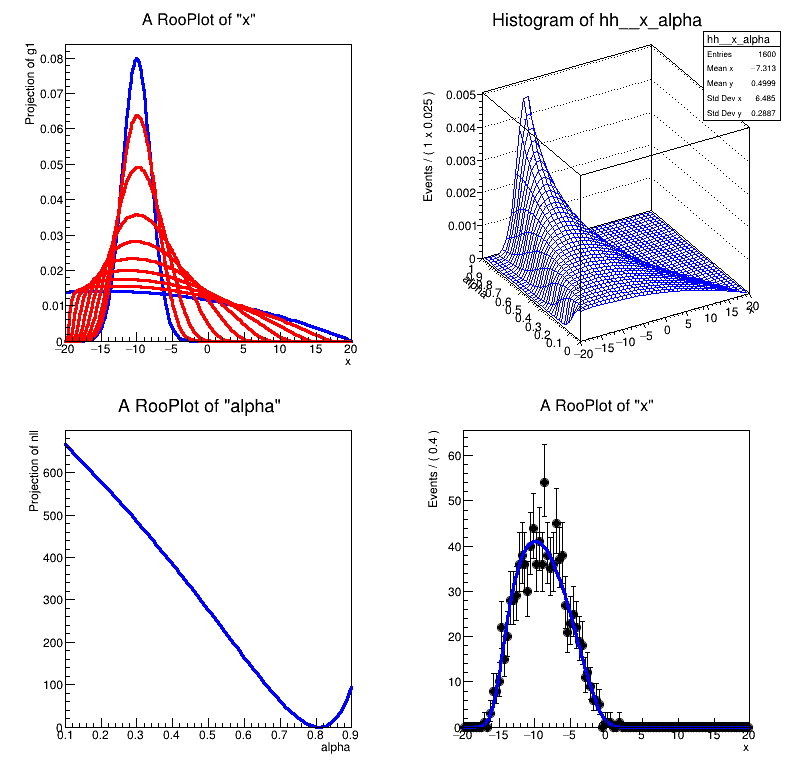

In [17]:
gROOT->GetListOfCanvases()->Draw()